Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as m
import seaborn as sb

pd.set_option('display.width', 1000)

# Read the CSV file into a DataFrame and immediately apply drop_duplicates()
superstore = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\SampleSuperstore.csv").drop_duplicates()

# Print the DataFrame without duplicates
print(superstore)


           Ship Mode    Segment        Country             City       State  Postal Code Region         Category Sub-Category     Sales  Quantity  Discount    Profit
0       Second Class   Consumer  United States        Henderson    Kentucky        42420  South        Furniture    Bookcases  261.9600         2      0.00   41.9136
1       Second Class   Consumer  United States        Henderson    Kentucky        42420  South        Furniture       Chairs  731.9400         3      0.00  219.5820
2       Second Class  Corporate  United States      Los Angeles  California        90036   West  Office Supplies       Labels   14.6200         2      0.00    6.8714
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida        33311  South        Furniture       Tables  957.5775         5      0.45 -383.0310
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida        33311  South  Office Supplies      Storage   22.3680         2      0.20    2.5164
... 

In [2]:
from tabulate import tabulate

# Count total rows and columns
Total_rows = superstore.shape[0]
Total_columns =superstore.shape[1]

# Create a table with row and column count
Table = (['Total_no_of_rows',Total_rows],["Total_no_of_columns",Total_columns])

#print datas in table format
print(tabulate(Table, headers=["Attribute","Count"], tablefmt= "grid"))

+---------------------+---------+
| Attribute           |   Count |
+=====================+=========+
| Total_no_of_rows    |    9977 |
+---------------------+---------+
| Total_no_of_columns |      13 |
+---------------------+---------+


In [3]:
# Find unique values in each column without repetition
for column_name in superstore.columns:
    # Print the name of the current column
    print("Column name:", column_name)
    
    # Extract the unique values from the current column
    unique_values = superstore[column_name].unique()
    
    # Print the unique values of the current column
    print("Unique values:", unique_values)
    print()  

Column name: Ship Mode
Unique values: ['Second Class' 'Standard Class' 'First Class' 'Same Day']

Column name: Segment
Unique values: ['Consumer' 'Corporate' 'Home Office']

Column name: Country
Unique values: ['United States']

Column name: City
Unique values: ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Sag

Data Cleaning

In [4]:
# Fill missing string values with 'unassigned'
columns_to_fill = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
replace_values = superstore[columns_to_fill].fillna(value='unassigned')

# Fill missing numeric values with 0
columns_to_fill_values = ['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']
replace_error_values = superstore[columns_to_fill_values].fillna(0)

# Combine the filled values for both sets of columns
superstore[columns_to_fill] = replace_values
superstore[columns_to_fill_values] = replace_error_values

# Print the DataFrame with missing string values replaced by 'unassigned' and missing numeric values replaced by 0
print(superstore)


           Ship Mode    Segment        Country             City       State  Postal Code Region         Category Sub-Category     Sales  Quantity  Discount    Profit
0       Second Class   Consumer  United States        Henderson    Kentucky        42420  South        Furniture    Bookcases  261.9600         2      0.00   41.9136
1       Second Class   Consumer  United States        Henderson    Kentucky        42420  South        Furniture       Chairs  731.9400         3      0.00  219.5820
2       Second Class  Corporate  United States      Los Angeles  California        90036   West  Office Supplies       Labels   14.6200         2      0.00    6.8714
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida        33311  South        Furniture       Tables  957.5775         5      0.45 -383.0310
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida        33311  South  Office Supplies      Storage   22.3680         2      0.20    2.5164
... 

In [5]:
# Group by 'Sub-Category' and find max sales
max_sales = superstore.groupby('Sub-Category')['Sales'].max().sort_values(ascending=False)
max_sales_data = max_sales.reset_index().head(1)
print('Maximum_no_of_Sales')
print(tabulate(max_sales_data, headers=['Sub-Category','Sales'], tablefmt='grid'))

print()

# Group by 'Sub-Category' and find min sales
min_sales = superstore.groupby('Sub-Category')['Sales'].min().loc[lambda x: x > 0].sort_values(ascending=True).round(2)
min_sales_data = min_sales.reset_index().head(1)
print('Minimum_no_of_Sales')
print(tabulate(min_sales_data, headers =['Sub-Category', 'Sales'], tablefmt = 'grid' ))


Maximum_no_of_Sales
+----+----------------+---------+
|    | Sub-Category   |   Sales |
+====+================+=========+
|  0 | Machines       | 22638.5 |
+----+----------------+---------+

Minimum_no_of_Sales
+----+----------------+---------+
|    | Sub-Category   |   Sales |
+====+================+=========+
|  0 | Appliances     |    0.44 |
+----+----------------+---------+


In [6]:
# Check for inconsistent data in the 'Sales', 'Quantity', 'Discount', and 'Profit' columns
# We will try to convert these columns to numeric data types, and any errors will indicate inconsistencies
try:
    superstore[['Sales', 'Quantity', 'Discount', 'Profit']] = superstore[['Sales', 'Quantity', 'Discount', 'Profit']].apply(pd.to_numeric)
    print("No inconsistent data found.")
except ValueError as e:
    print("Inconsistent data found. Error:", e)


No inconsistent data found.


Detecting Outliers

<Axes: ylabel='Sales'>

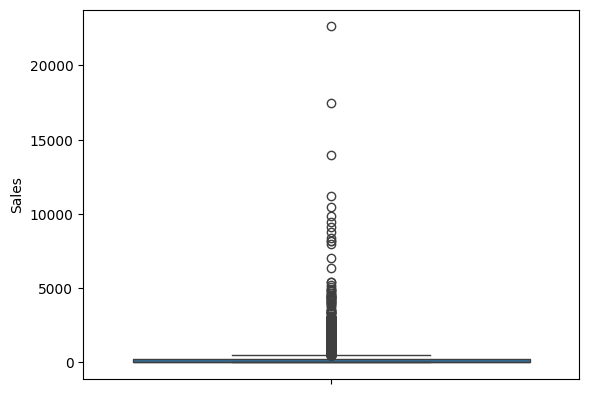

In [7]:
# to see outliers clearly
sb.boxplot(superstore['Sales'])

<Axes: ylabel='Sales'>

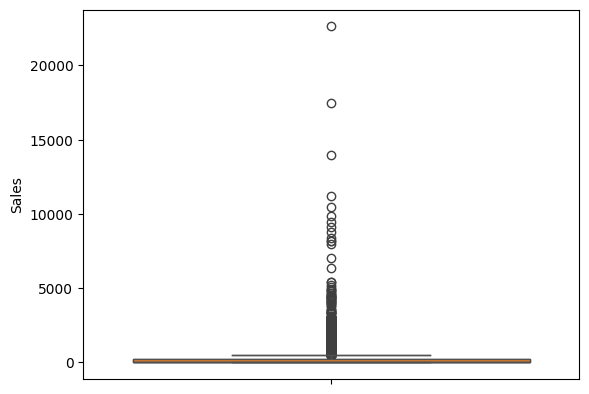

In [8]:
# Detect outliers using a boxplot
sb.boxplot(superstore['Sales'])

# Calculate the upper and lower bounds using the IQR method
Q1 = superstore['Sales'].quantile(0.25)
Q3 = superstore['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
superstore['Sales_capped'] = superstore['Sales'].clip(lower=lower_bound, upper=upper_bound)

# Display the boxplot after capping outliers
sb.boxplot(superstore['Sales_capped'])


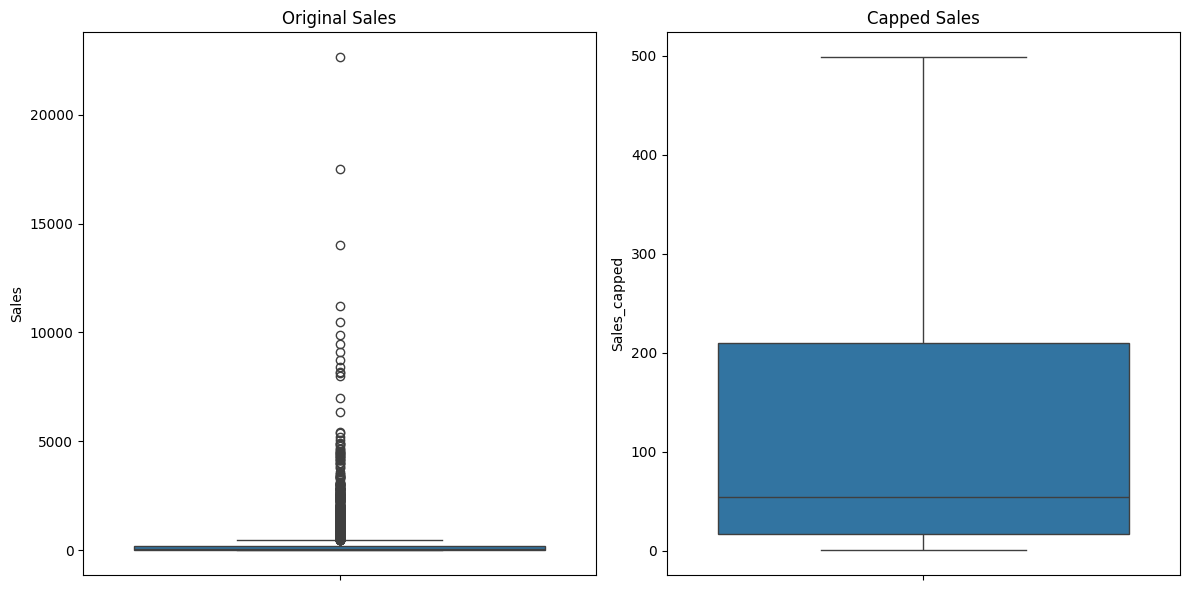

In [9]:
import matplotlib.pyplot as plt

# Create subplots to display boxplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original 'Sales' column
sb.boxplot(superstore['Sales'], ax=axes[0])
axes[0].set_title('Original Sales')

# Plot the capped 'Sales_capped' column
sb.boxplot(superstore['Sales_capped'], ax=axes[1])
axes[1].set_title('Capped Sales')

plt.tight_layout()
plt.show()


Remove column and Rename the Column

In [10]:
Remove_Columns = superstore.drop(columns=['Sales'],inplace=True)
print(Remove_Columns)

None


In [11]:
Rename_Columns = superstore.rename(columns = {'Sales_capped': 'Sales'}, inplace=True)
print(Rename_Columns)

None


In [12]:
superstore

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Quantity,Discount,Profit,Sales
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,2,0.00,41.9136,261.960
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,3,0.00,219.5820,498.975
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,2,0.00,6.8714,14.620
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,5,0.45,-383.0310,498.975
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,2,0.20,2.5164,22.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,3,0.20,4.1028,25.248
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,2,0.00,15.6332,91.960
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,2,0.20,19.3932,258.576
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,4,0.00,13.3200,29.600


Sales Analysis
-------------

Total_Sales_by_Category

Total Sales based on Category
+----+-----------------+---------+
|    | Category        |   Sales |
+====+=================+=========+
|  0 | Office Supplies |  492806 |
+----+-----------------+---------+
|  1 | Furniture       |  480206 |
+----+-----------------+---------+
|  2 | Technology      |  428005 |
+----+-----------------+---------+


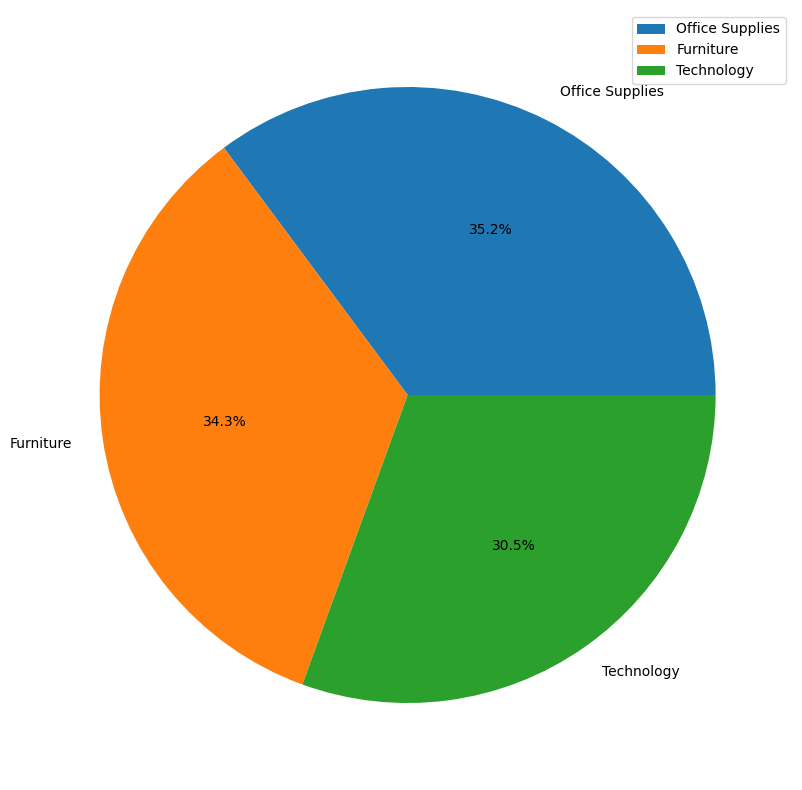

In [13]:
# Filter out rows with 'Category' as 'unassigned'
filtered_superstore = superstore[superstore['Category'] != 'unassigned']

# Calculate total sales by category and round the result to two decimal places
total_sales_by_category = filtered_superstore.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sorted_values = total_sales_by_category.reset_index().head().round(2)

print('Total Sales based on Category')
print(tabulate(sorted_values, headers=['Category', 'Sales'], tablefmt='grid'))

# Plot the pie chart
sorted_values.plot(kind='pie', y='Sales', labels=sorted_values['Category'], figsize=[15, 10], autopct='%1.1f%%', legend=True, ylabel="")

# Show the plot
m.show()


Top 5 Selling Products

Top 5 Selling products
+----+----------------+-----------------+------------+----------+
|    | Sub-Category   | Category        |   Quantity |    Sales |
+====+================+=================+============+==========+
|  0 | Binders        | Office Supplies |       5971 | 100927   |
+----+----------------+-----------------+------------+----------+
|  1 | Paper          | Office Supplies |       5144 |  77598.8 |
+----+----------------+-----------------+------------+----------+
|  2 | Furnishings    | Furniture       |       3560 |  85008.2 |
+----+----------------+-----------------+------------+----------+
|  3 | Phones         | Technology      |       3289 | 222370   |
+----+----------------+-----------------+------------+----------+
|  4 | Storage        | Office Supplies |       3158 | 165560   |
+----+----------------+-----------------+------------+----------+


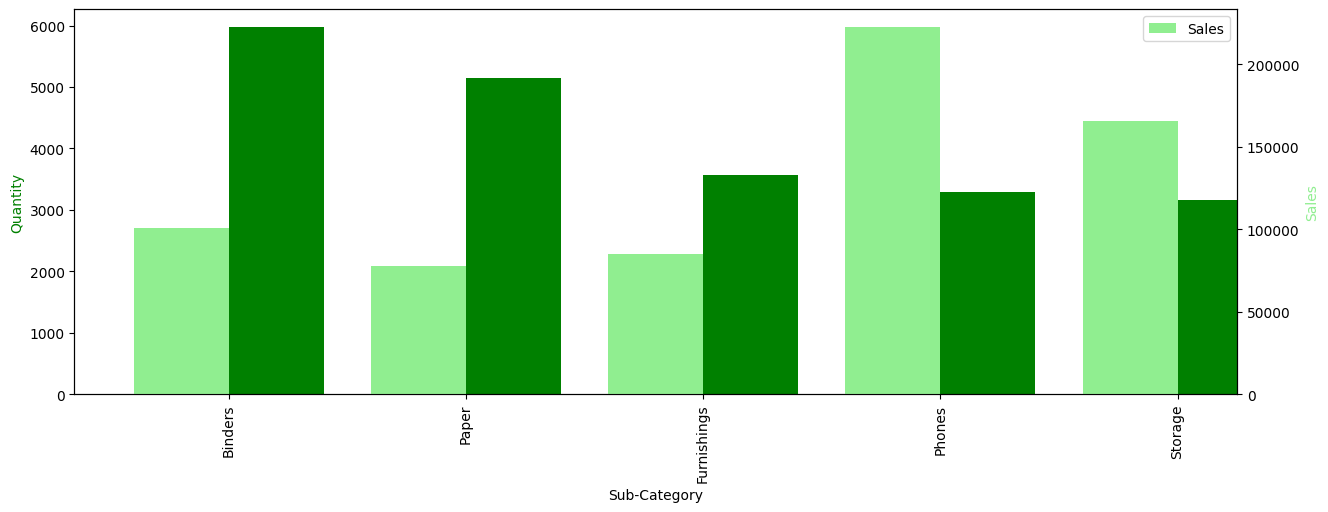

In [14]:
# Calculate total quantity sold and sales for each product (sub-category)
Top_selling_products = superstore.groupby(['Sub-Category', 'Category']).agg({'Quantity': 'sum', 'Sales': 'sum'})

# Sort the total quantity sold in descending order and select the top 5
sorted_products = Top_selling_products.sort_values(by='Quantity', ascending=False).head(5).reset_index()

print('Top 5 Selling products')
print(tabulate(sorted_products, headers=["Sub-Category", "Category", "Quantity", "Sales"], tablefmt='grid'))

# Create a figure and axis objects
fig, ax1 = m.subplots(figsize=[15,5])

# Plot quantity on primary y-axis
sorted_products.plot(kind='bar', x='Sub-Category', y='Quantity', ax=ax1, color='Green', width=0.4, position=0, legend=False)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot sales on secondary y-axis
sorted_products.plot(kind='bar', x='Sub-Category', y='Sales', ax=ax2, color='lightgreen', width=0.4, position=1)

# Set labels for x and y axes
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Quantity', color='Green')
ax2.set_ylabel('Sales', color='lightgreen')

# Show the plot
m.show()


Bottom 5 Selling Products

+----+----------------+------------+---------+
|    | Sub-Category   |   Quantity |   Sales |
+====+================+============+=========+
|  0 | Copiers        |        234 | 33282.4 |
+----+----------------+------------+---------+
|  1 | Machines       |        440 | 44898.7 |
+----+----------------+------------+---------+
|  2 | Supplies       |        647 | 16132.4 |
+----+----------------+------------+---------+
|  3 | Bookcases      |        868 | 71988.5 |
+----+----------------+------------+---------+
|  4 | Envelopes      |        906 | 16370.7 |
+----+----------------+------------+---------+


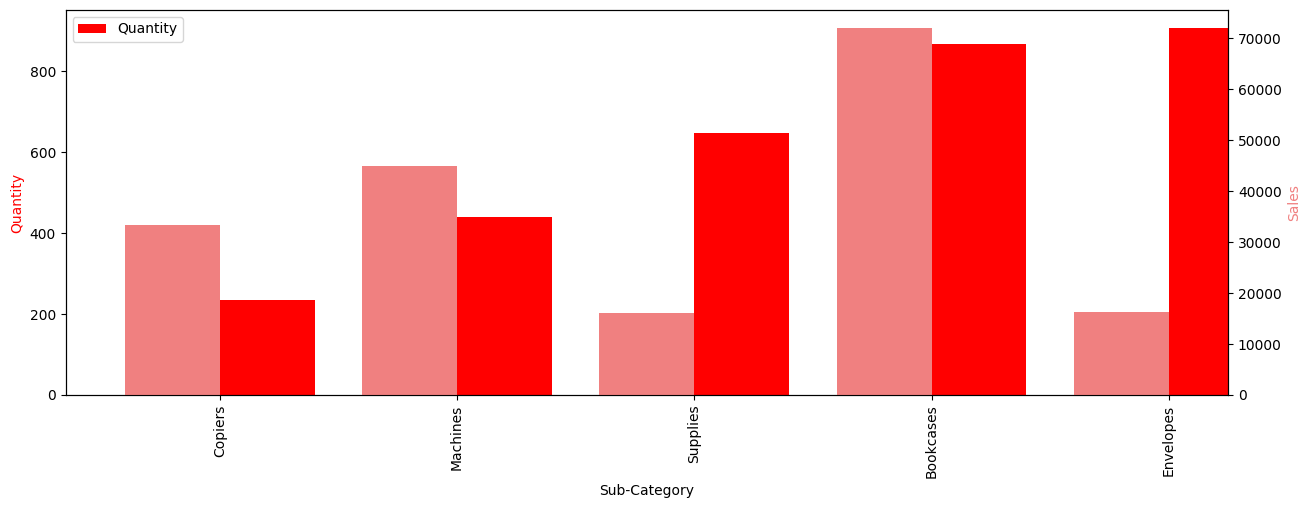

In [15]:
# Group by 'Sub-Category' and calculate total quantity and sales
bottom_products = superstore.groupby('Sub-Category').agg({'Quantity': 'sum', 'Sales': 'sum'}).sort_values(by='Quantity', ascending=True).head(5).reset_index()

print(tabulate(bottom_products, headers=['Sub-Category', 'Quantity', 'Sales'], tablefmt='grid'))

# Create a figure and axis objects
fig, ax1 = m.subplots(figsize=[15,5])

# Plot quantity on primary y-axis
bottom_products.plot(kind='bar', x='Sub-Category', y='Quantity', ax=ax1, color='red', width=0.4, position=0)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot sales on secondary y-axis
bottom_products.plot(kind='bar', x='Sub-Category', y='Sales', ax=ax2, color='lightcoral', width=0.4, position=1, legend=False)

# Set labels for x and y axes
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Quantity', color='red')
ax2.set_ylabel('Sales', color='lightcoral')

# Show the plot
m.show()


Profit Analysis
---------------

Profit based on Category and sub_Category

Averaged profit based on Product Category:
+----+-----------------+----------------+-----------+
|    | Category        | Sub-Category   |    Profit |
+====+=================+================+===========+
|  1 | Technology      | Copiers        | 817.909   |
+----+-----------------+----------------+-----------+
|  2 | Technology      | Accessories    |  54.1118  |
+----+-----------------+----------------+-----------+
|  3 | Technology      | Phones         |  50.0739  |
+----+-----------------+----------------+-----------+
|  4 | Furniture       | Chairs         |  43.1986  |
+----+-----------------+----------------+-----------+
|  5 | Office Supplies | Appliances     |  38.9228  |
+----+-----------------+----------------+-----------+
|  6 | Technology      | Machines       |  29.4327  |
+----+-----------------+----------------+-----------+
|  7 | Office Supplies | Envelopes      |  27.418   |
+----+-----------------+----------------+-----------+
|  8 | Office Supplies | Storage       

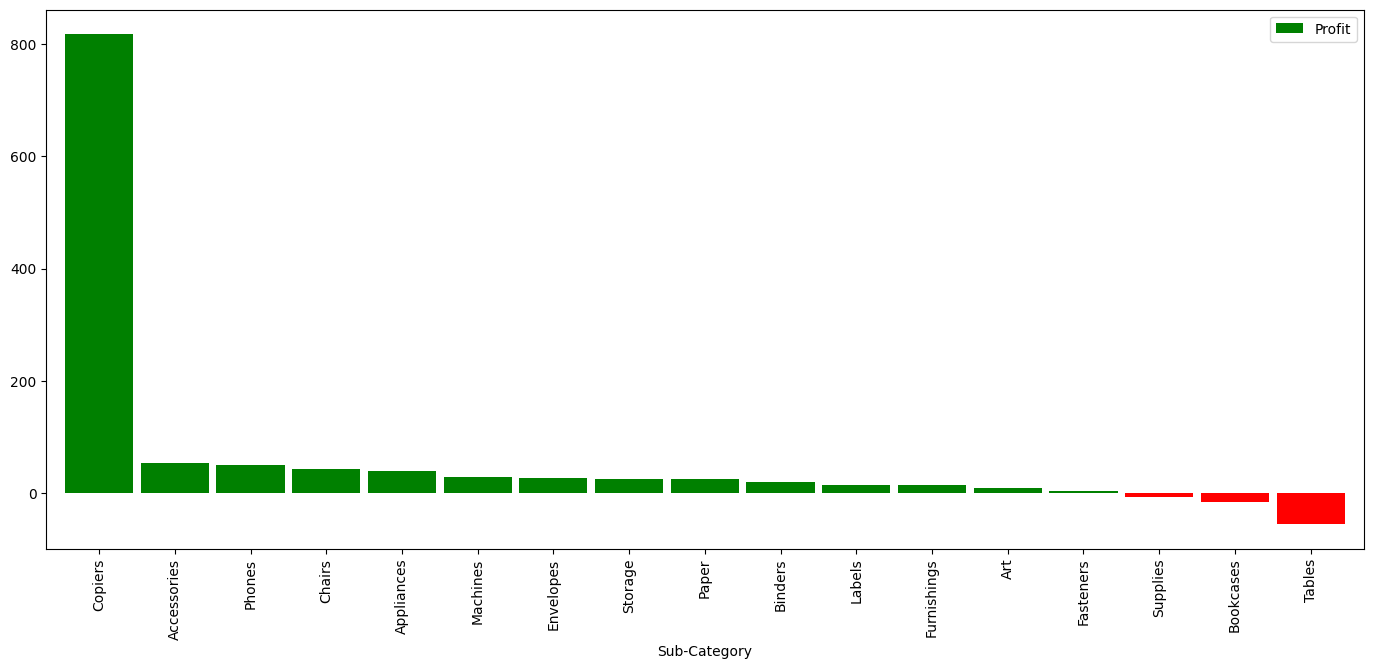

In [16]:
# Group by 'Category' and 'Sub-Category', find mean profit, sort descending, then reset index
profit_products = superstore.groupby(['Category', 'Sub-Category'])['Profit'].mean()
sorted_profit_products = profit_products.sort_values(ascending=False).reset_index()

# Reset the index to start from 1 instead of 0 for better presentation
sorted_profit_products.index = sorted_profit_products.index + 1

# Print the data in table format
print('Averaged profit based on Product Category:')
print(tabulate(sorted_profit_products, headers='keys', tablefmt='grid'))

# Plotting the data
sorted_profit_products['Color'] = ['green' if profit > 0 else 'red' for profit in sorted_profit_products['Profit']]
Table = sorted_profit_products.plot(kind='bar', x='Sub-Category', y='Profit', figsize=[17,7], width=0.9, color=sorted_profit_products['Color'])

# add legend
m.legend()

# Display Chart
m.show()


Top 5 high Profitable Products

Top 5 high Profitable Products

+----+----------------+----------+
|    | Sub_Category   |   Profit |
+====+================+==========+
|  1 | Copiers        |  55617.8 |
+----+----------------+----------+
|  2 | Phones         |  44515.7 |
+----+----------------+----------+
|  3 | Accessories    |  41936.6 |
+----+----------------+----------+
|  4 | Paper          |  33944.2 |
+----+----------------+----------+
|  5 | Binders        |  30228   |
+----+----------------+----------+


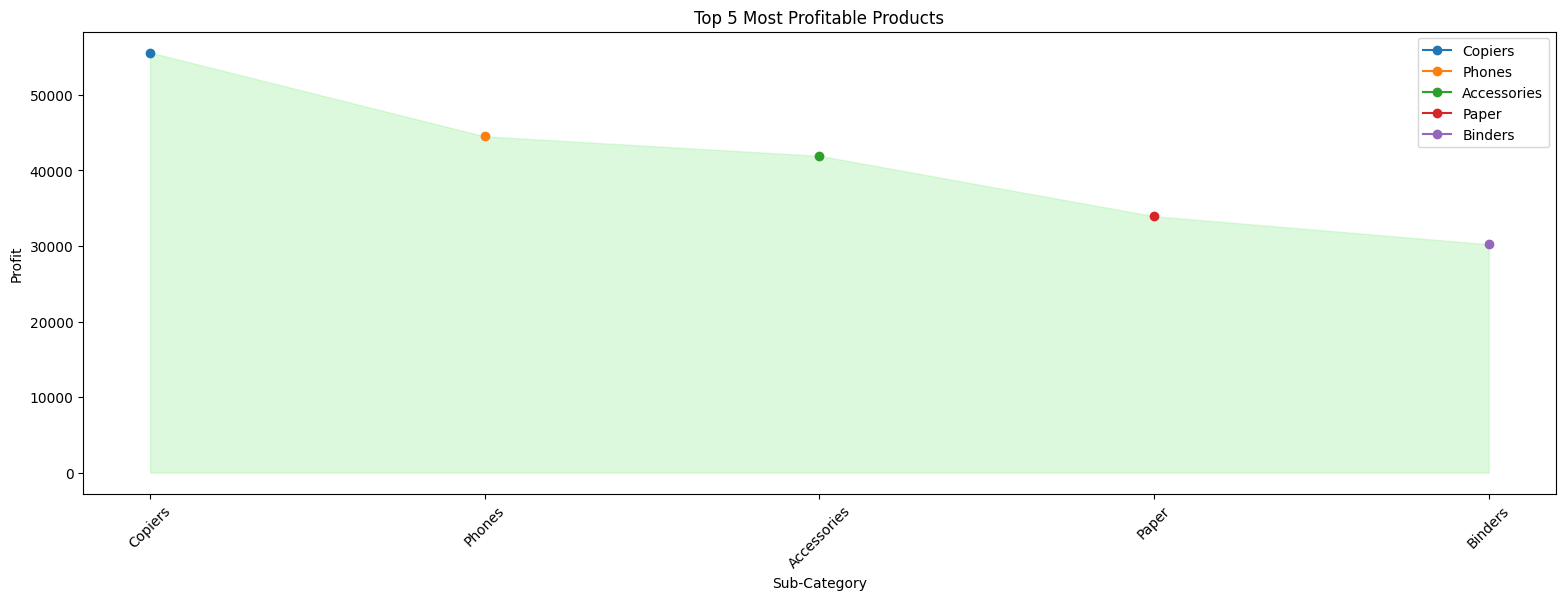

In [17]:
# Group by 'Sub-Category', sum the profits, and sort in descending order
profitable = superstore.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).reset_index().head(5).round(1)

profitable.index = profitable.index + 1

# Print the top 5 most profitable products
print('Top 5 high Profitable Products')
print()
print(tabulate(profitable, headers=['Sub_Category','Profit'], tablefmt='grid'))

# Plotting the area chart
m.figure(figsize=(19, 6))
for index, row in profitable.iterrows():
    m.plot( row['Sub-Category'], row['Profit'], marker='o', label=row['Sub-Category'])

m.fill_between(profitable['Sub-Category'], profitable['Profit'], color='lightgreen', alpha=0.3)

# Adding labels and title
m.xlabel('Sub-Category')
m.ylabel('Profit')
m.xticks(rotation=45)
m.title('Top 5 Most Profitable Products')

# adding legend
m.legend()

# Display the chart
m.show()


Bottom 5 Low profit Products

Low_profit_products
+----+----------------+----------+
|    | Sub-Category   |   Profit |
+====+================+==========+
|  0 | Tables         | -17725.5 |
+----+----------------+----------+
|  1 | Bookcases      |  -3472.6 |
+----+----------------+----------+
|  2 | Supplies       |  -1189.1 |
+----+----------------+----------+
|  3 | Fasteners      |    949.5 |
+----+----------------+----------+
|  4 | Machines       |   3384.8 |
+----+----------------+----------+


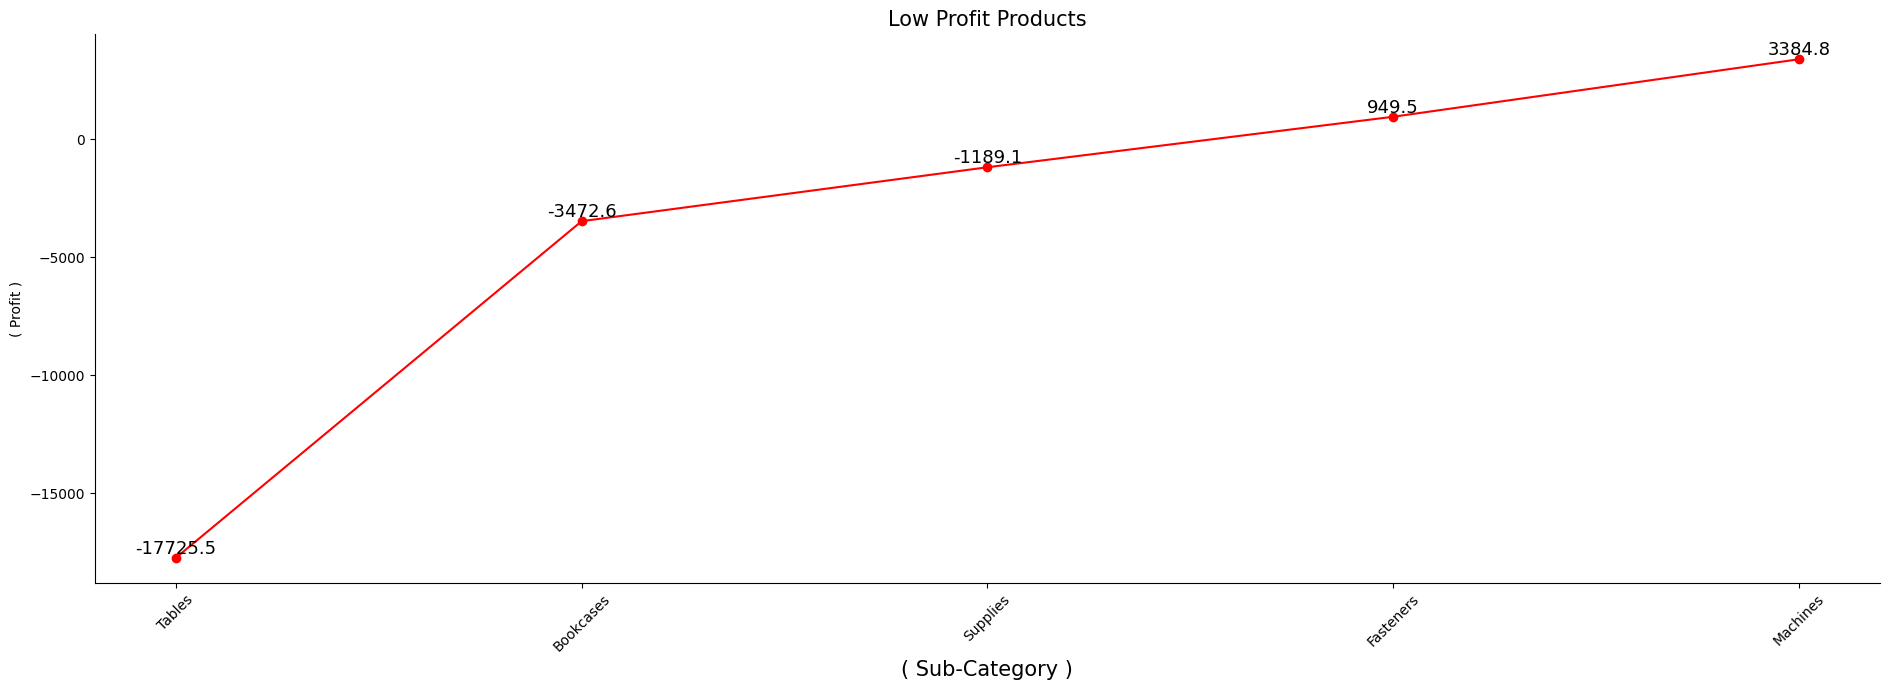

In [18]:
bottom_products = superstore.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=True).round(1).head(5).reset_index()
print('Low_profit_products')
print(tabulate(bottom_products, headers=['Sub-Category', 'Profit'], tablefmt='grid'))

# Plotting the bar chart
fig, ax = plt.subplots(figsize=[19, 7])
ax.plot(bottom_products['Sub-Category'], bottom_products['Profit'], color='red', marker='o')

# Adding data labels
for i, (x, y) in enumerate(zip(bottom_products['Sub-Category'], bottom_products['Profit'])):
    ax.text(i, y, f'{y}', ha='center', va='bottom', fontsize=13)

# Adding labels and title
ax.set_ylabel('( Profit )')
ax.set_xlabel('( Sub-Category )', fontsize=15)
ax.set_title('Low Profit Products',fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Segment Analysis
---------------

Comparing sales and profits across different customer segments

Comparing sales and profits across different customer segments

+--------+-------------+----------+----------+
|   S.no | Segment     |    Sales |   Profit |
+========+=============+==========+==========+
|      1 | Consumer    | 719063.4 | 134007.4 |
+--------+-------------+----------+----------+
|      2 | Corporate   | 431043.1 |  91955.0 |
+--------+-------------+----------+----------+
|      3 | Home Office | 250910.1 |  60279.0 |
+--------+-------------+----------+----------+


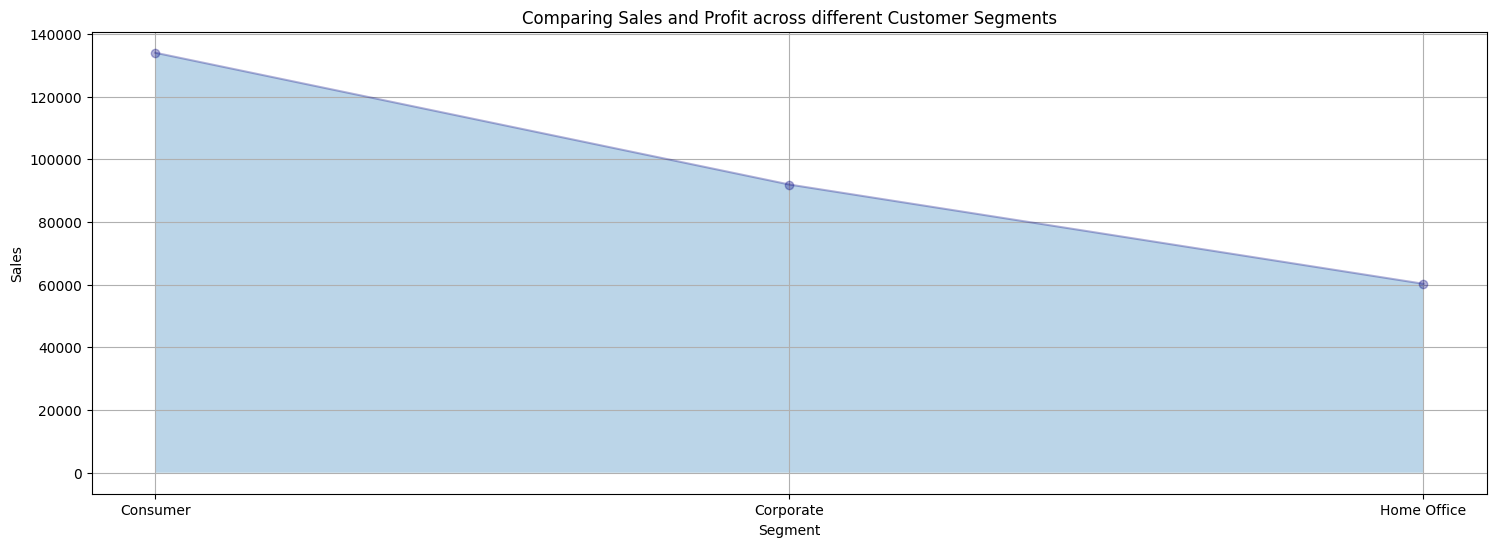

In [19]:
# Calculate total quantity sold and sales for each product (sub-category)
segment_analysis = superstore.groupby(['Segment']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Sort the total quantity sold in descending order and select the top 5
sorted_products = segment_analysis.sort_values(by='Profit', ascending=False)

# Format the 'Sales' column to one decimal place
sorted_products['Sales'] = sorted_products['Sales'].apply(lambda x: '{:.1f}'.format(x))

sorted_products.index = sorted_products.index + 1

print('Comparing sales and profits across different customer segments')
print()
print(tabulate(sorted_products, headers=['S.no', "Segment", "Sales", "Profit"], tablefmt='grid', floatfmt='.1f'))

# Plot the area chart with markers
m.figure(figsize=(18, 6))
m.plot(sorted_products['Segment'], sorted_products['Profit'], marker='o', alpha=0.3, color = 'navy')
m.fill_between(sorted_products['Segment'], sorted_products['Profit'], alpha=0.3)
m.title('Comparing Sales and Profit across different Customer Segments')
m.xlabel('Segment')
m.grid(True)
m.ylabel('Sales')

# Display the plot
m.show()

Quantity based on Customer Segment

In [20]:
# Calculate total quantity sold and sales for each product (sub-category)
segment_analysis = superstore.groupby(['Segment','Category']).agg({'Quantity':'sum','Sales':'sum','Profit':'sum'}).sort_values(by ='Profit',ascending=False).reset_index()

# Format the 'Sales' column to one decimal place
segment_analysis['Sales'] = segment_analysis['Sales'].apply(lambda x: '{:.1f}'.format(x))

segment_analysis.index = segment_analysis.index + 1

print('Comparing sales and profits across different customer segments')
print()
print(tabulate(segment_analysis, headers=['S.No','Segment','Category','Quantity','Sales','Profit'], tablefmt='grid', floatfmt='.1f'))

Comparing sales and profits across different customer segments

+--------+-------------+-----------------+------------+----------+----------+
|   S.No | Segment     | Category        |   Quantity |    Sales |   Profit |
+========+=============+=================+============+==========+==========+
|      1 | Consumer    | Technology      |       3597 | 219411.0 |  70797.8 |
+--------+-------------+-----------------+------------+----------+----------+
|      2 | Consumer    | Office Supplies |      11737 | 247497.2 |  56253.7 |
+--------+-------------+-----------------+------------+----------+----------+
|      3 | Corporate   | Technology      |       2095 | 125120.7 |  44167.0 |
+--------+-------------+-----------------+------------+----------+----------+
|      4 | Corporate   | Office Supplies |       7001 | 156703.9 |  40203.2 |
+--------+-------------+-----------------+------------+----------+----------+
|      5 | Home Office | Technology      |       1247 |  83473.7 |  30490.1 |


Frequent Customers

In [21]:
frequent = superstore.groupby(['Segment', 'Postal Code',  'City']).size().reset_index(name='Repeated_customers').sort_values(by='Repeated_customers', ascending=False).reset_index(drop=True)
frequent.index = frequent.index + 1
print(tabulate(frequent, headers=['S.No', 'Segment', 'Postal Code',  'City', 'Repeated_customers'], tablefmt='grid'))

+--------+-------------+---------------+-------------------+----------------------+
|   S.No | Segment     |   Postal Code | City              |   Repeated_customers |
+========+=============+===============+===================+======================+
|      1 | Consumer    |         10035 | New York City     |                  151 |
+--------+-------------+---------------+-------------------+----------------------+
|      2 | Consumer    |         10024 | New York City     |                  131 |
+--------+-------------+---------------+-------------------+----------------------+
|      3 | Consumer    |         94122 | San Francisco     |                  113 |
+--------+-------------+---------------+-------------------+----------------------+
|      4 | Consumer    |         10009 | New York City     |                  113 |
+--------+-------------+---------------+-------------------+----------------------+
|      5 | Consumer    |         10011 | New York City     |                

Geographical_Analysis
---------------------

Average of  best Profit Based on Regions

Average Profit by Region
+----+----------+----------+
|    | Region   |   Profit |
+====+==========+==========+
|  0 | West     |    33.93 |
+----+----------+----------+
|  1 | East     |    32.16 |
+----+----------+----------+
|  2 | South    |    28.86 |
+----+----------+----------+
|  3 | Central  |    17.1  |
+----+----------+----------+


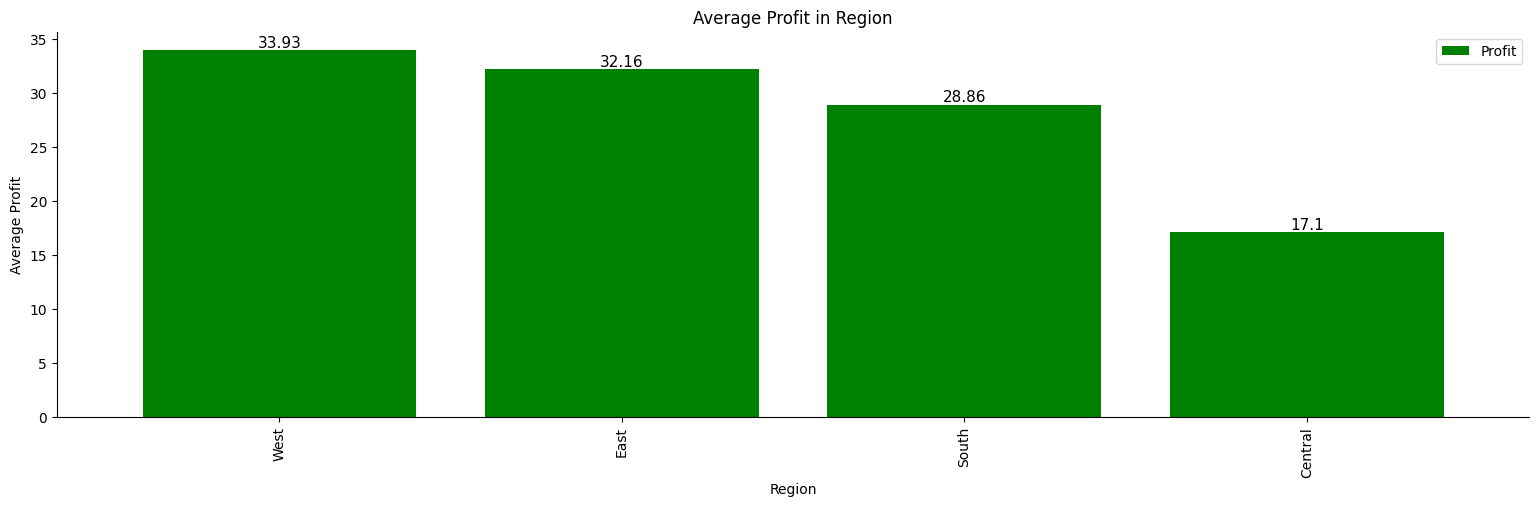

In [22]:
# Calculate Average profit by region and round the result to two decimal places
average_profit_by_region = superstore.groupby('Region')['Profit'].mean().round(2)

# Sort the average profit by region in descending order based on profit data
sorted_based_on_profit = average_profit_by_region.sort_values(ascending=False).reset_index()

# Print the sorted data
print('Average Profit by Region')
print(tabulate(sorted_based_on_profit, headers=['Region', 'Profit'], tablefmt="grid"))

# Plot the Average profit by region as a bar chart
fig, ax = m.subplots(figsize=(19, 5))
sorted_based_on_profit.plot(kind='bar', x='Region', y='Profit', ax=ax, color="Green", width=0.8)

# Add data labels to the bars
for i, (index, row) in enumerate(sorted_based_on_profit.iterrows()):
    ax.text(i, row['Profit'], f'{row["Profit"]}', ha='center', va='bottom', fontsize=11)

# Set plot title and labels
ax.set_xlabel('Region')
ax.set_ylabel('Average Profit')

# Remove outline box (frame) around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# chart title
m.title('Average Profit in Region')

# Show the plot
m.show()


Best Profit States

Best Profit States
+--------+------------+-----------------+----------------+----------+---------+
|   S.no | State      | Category        | Sub-Category   |   Profit |   Sales |
+========+============+=================+================+==========+=========+
|      1 | New York   | Technology      | Machines       |    17320 |    6688 |
+--------+------------+-----------------+----------------+----------+---------+
|      2 | New York   | Technology      | Phones         |    13399 |   28015 |
+--------+------------+-----------------+----------------+----------+---------+
|      3 | New York   | Office Supplies | Binders        |    11096 |   16220 |
+--------+------------+-----------------+----------------+----------+---------+
|      4 | California | Technology      | Accessories    |    11096 |   27104 |
+--------+------------+-----------------+----------------+----------+---------+
|      5 | Michigan   | Office Supplies | Binders        |    11080 |    4772 |
+--------+-----------

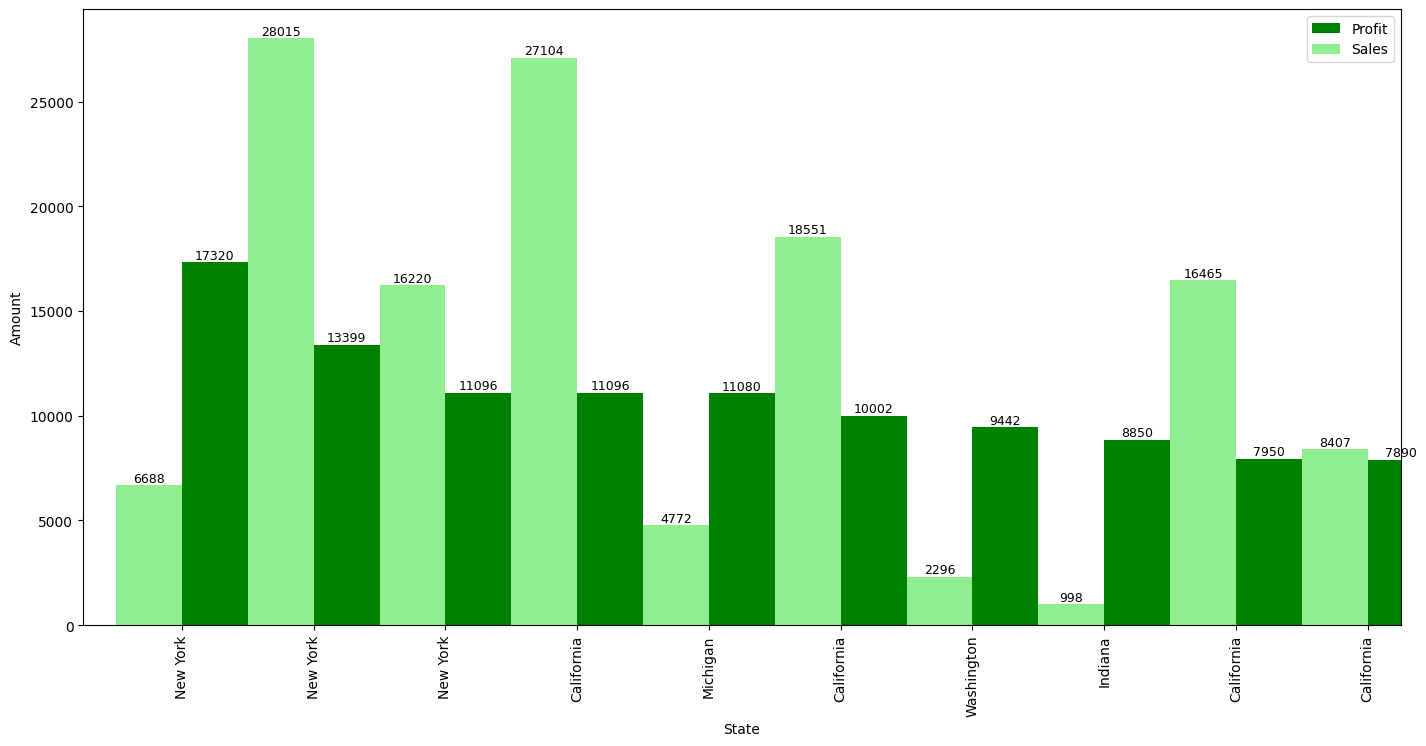

In [23]:
# Calculate total profit by state and sort in descending order
profit = superstore.groupby(['State', 'Category', 'Sub-Category']).agg({'Profit': 'sum', 'Sales': 'sum'}).sort_values(by='Profit', ascending=False)

profit_states = profit.head(10).round().reset_index()

profit_states.index = profit_states.index + 1

# Print the top 5 states with their corresponding profits
print('Best Profit States')
print(tabulate(profit_states, headers=['S.no', 'State', 'Category', 'Sub-Category', 'Profit', 'Sales'], tablefmt='grid'))

# Create a bar chart
fig, ax = m.subplots(figsize=[17, 8])

# Plot the top 5 states with their corresponding profits
profit_states.plot(kind='bar', x='State', y='Profit', ax=ax, color='green', width=0.5, position=0, label='Profit')
profit_states.plot(kind='bar', x='State', y='Sales', ax=ax, color='lightgreen', width=0.5, position=1, label='Sales')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

# Set labels for x and y axes
ax.set_xlabel('State')
ax.set_ylabel('Amount')
ax.legend()

# Show the plot
m.show()

Low Profit States

+--------+----------------+-----------------+----------------+----------+---------+
|   S.no | State          | Category        | Sub-Category   |   Profit |   Sales |
+========+================+=================+================+==========+=========+
|      1 | Texas          | Office Supplies | Binders        |   -14705 |    5088 |
+--------+----------------+-----------------+----------------+----------+---------+
|      2 | Ohio           | Technology      | Machines       |   -11771 |    2833 |
+--------+----------------+-----------------+----------------+----------+---------+
|      3 | Illinois       | Office Supplies | Binders        |    -7198 |    2880 |
+--------+----------------+-----------------+----------------+----------+---------+
|      4 | Texas          | Office Supplies | Appliances     |    -6147 |    2408 |
+--------+----------------+-----------------+----------------+----------+---------+
|      5 | North Carolina | Technology      | Machines       |    -5385 |   

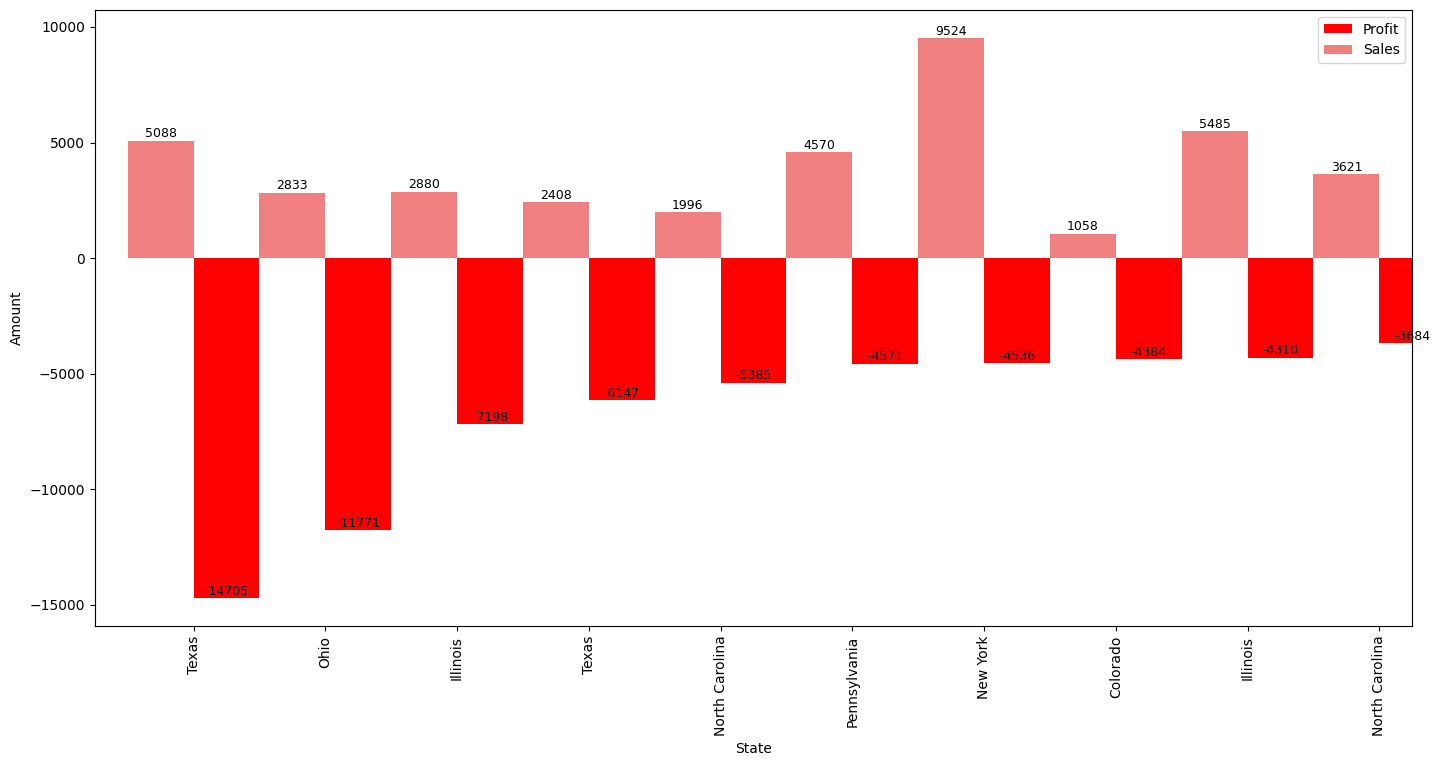

In [24]:
# Calculate total profit by state and sub-category and sort in descending order
low_profit = superstore.groupby(['State' , 'Category', 'Sub-Category']).agg({'Profit':'sum', 'Sales':'sum'}).sort_values(by='Profit', ascending=True).reset_index()

# Select the top 5 low-profit states and round the values
low_profit_states = low_profit.head(10).round()

# Adjust the index to start from 1
low_profit_states.index = low_profit_states.index + 1

# Print the low 5 states with their corresponding profits
print(tabulate(low_profit_states, headers=['S.no','State' , 'Category', 'Sub-Category', 'Profit', 'Sales'], tablefmt='grid'))

# Create a bar chart
fig, ax = m.subplots(figsize=[17, 8])

# Plot the top 5 states with their corresponding profits
low_profit_states.plot(kind='bar', x='State', y='Profit', ax=ax, color='red', width=0.5, position=0, label='Profit')
low_profit_states.plot(kind='bar', x='State', y='Sales', ax=ax, color='lightcoral', width=0.5, position=1, label='Sales')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

# Set labels for x and y axes
ax.set_xlabel('State')
ax.set_ylabel('Amount')
ax.legend()

# Show the plot
m.show()


Discount Analysis
-----------------

Impact of discounts on sales and profit.

+------------+-----------+-----------+
|   Discount |     Sales |    Profit |
+============+===========+===========+
|       0.00 | 641401.98 | 320844.41 |
+------------+-----------+-----------+
|       0.10 |  30233.16 |   9029.18 |
+------------+-----------+-----------+
|       0.15 |  18521.68 |   1418.99 |
+------------+-----------+-----------+
|       0.20 | 498665.17 |  90306.61 |
+------------+-----------+-----------+
|       0.30 |  74489.16 | -10357.22 |
+------------+-----------+-----------+
|       0.32 |   9018.16 |  -2391.14 |
+------------+-----------+-----------+
|       0.40 |  61307.13 | -23057.05 |
+------------+-----------+-----------+
|       0.45 |   4184.23 |  -2493.11 |
+------------+-----------+-----------+
|       0.50 |  20441.87 | -20506.43 |
+------------+-----------+-----------+
|       0.60 |   6644.70 |  -5944.66 |
+------------+-----------+-----------+
|       0.70 |  24758.47 | -40075.36 |
+------------+-----------+-----------+
|       0.80 |  11350.90 

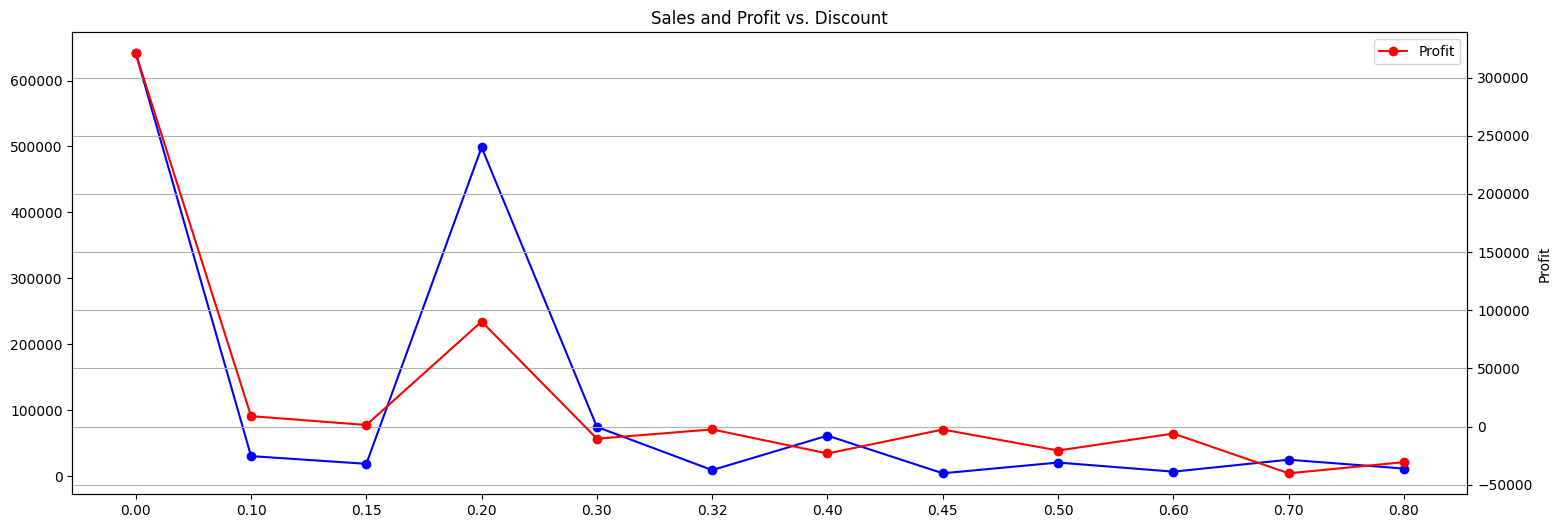

In [25]:
discount_analysis = superstore.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'})

# Formatting the index (which represents the discount levels)
discount_analysis.index = discount_analysis.index.map(lambda x: f'{x:.2f}')

# Printing the tabulated DataFrame
print(tabulate(discount_analysis, headers=['Discount', 'Sales', 'Profit'], tablefmt='grid', floatfmt='.2f'))

m.figure(figsize=[18, 6])

# Plotting Sales
m.plot(discount_analysis.index, discount_analysis['Sales'], marker='o', color='blue', label='Sales')

# Plotting Profit on the secondary y-axis
m.twinx()  # Creating a twin Axes object
m.plot(discount_analysis.index, discount_analysis['Profit'], marker='o', color='red', label='Profit')

m.xlabel('Discount')
m.ylabel('Profit')
m.title('Sales and Profit vs. Discount')
m.legend(loc='upper right')
m.grid(True)
m.show()

Optimal discount level for maximizing the profit

Optimal discount level for maximizing profit: 0.0

+--------+------------+-----------+
|   S.No |   Discount |    Profit |
+========+============+===========+
|      0 |       0    | 320844    |
+--------+------------+-----------+
|      1 |       0.1  |   9029.18 |
+--------+------------+-----------+
|      2 |       0.15 |   1418.99 |
+--------+------------+-----------+
|      3 |       0.2  |  90306.6  |
+--------+------------+-----------+


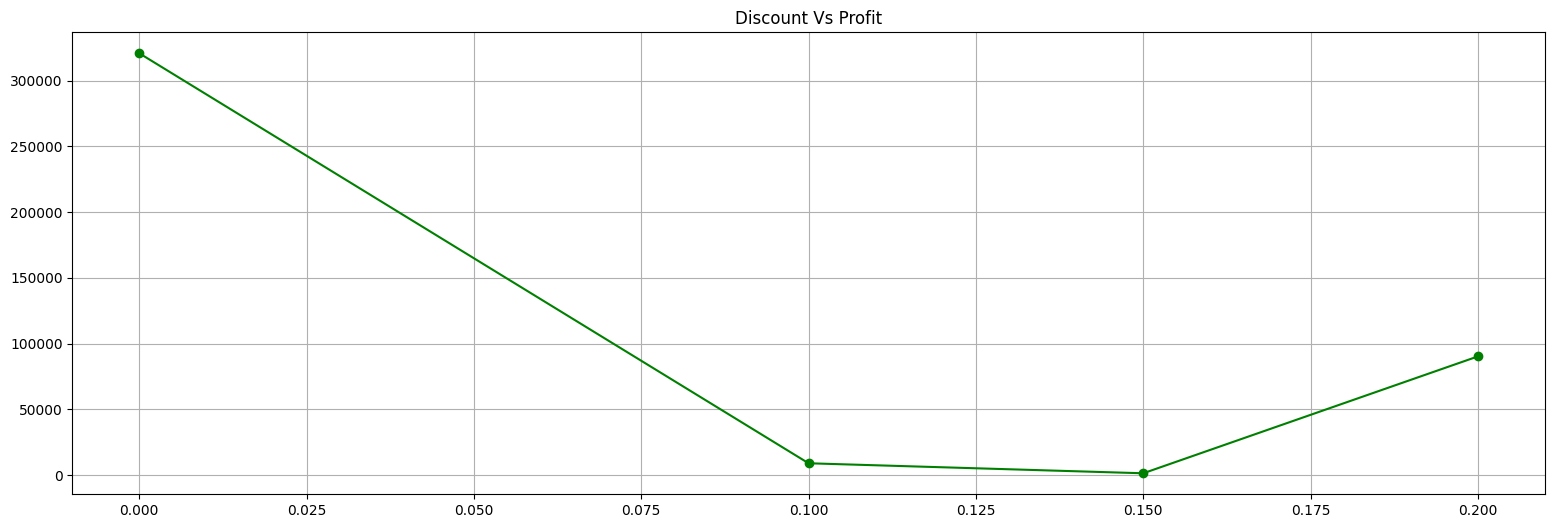

In [26]:
max_profit = superstore.groupby('Discount')['Profit'].sum().head(4).round(2).reset_index()
max_profit = max_profit.sort_values(by= 'Discount', ascending = True)

print('Optimal discount level for maximizing profit: 0.0')
print()
print(tabulate(max_profit, headers = ['S.No', 'Discount','Profit'], tablefmt = 'grid'))

m.figure(figsize=[19,6])

m.plot(max_profit['Discount'], max_profit['Profit'], color='green', marker = 'o')
m.title('Discount Vs Profit')
m.grid(True)
m.show()

Product- Category Analysis
--------------------------

most popular categories and sub-categories.

+--------+-----------------+------------+
|   S.No | Category        |   Quantity |
+========+=================+============+
|      1 | Office Supplies |      22861 |
+--------+-----------------+------------+
|      2 | Furniture       |       8020 |
+--------+-----------------+------------+
|      3 | Technology      |       6939 |
+--------+-----------------+------------+


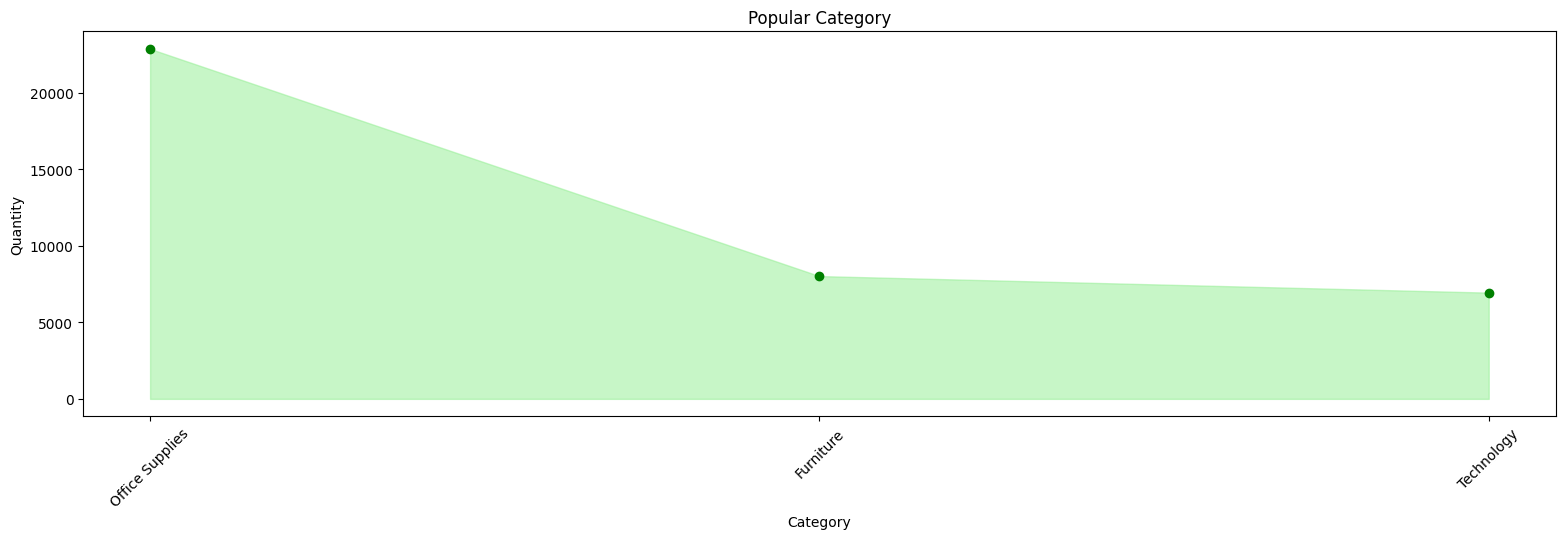

In [27]:
# Group by 'Category' and sum the 'Quantity'
product = superstore.groupby('Category')['Quantity'].sum().reset_index()
product = product.sort_values(by='Quantity', ascending=False).reset_index(drop=True)
product.index = product.index + 1

# Print the sorted DataFrame
print(tabulate(product, headers=['S.No', 'Category', 'Quantity'], tablefmt='grid'))

# Plotting the area chart
m.figure(figsize=(19, 5))

# Plot the area chart using fill_between
m.fill_between(product['Category'], product['Quantity'], color='lightgreen', alpha=0.5)

# Plot markers on top of the area chart
m.scatter(product['Category'], product['Quantity'], marker='o',color='green', label='Quantity')

# Adding labels and title
m.xlabel('Category')
m.ylabel('Quantity')
m.xticks(rotation=45)
m.title('Popular Category')

# Display the chart
m.show()

Most Popular Sub-Categories

+--------+----------------+------------+
|   S.No | Sub-Category   |   Quantity |
+========+================+============+
|      1 | Binders        |       5971 |
+--------+----------------+------------+
|      2 | Paper          |       5144 |
+--------+----------------+------------+
|      3 | Furnishings    |       3560 |
+--------+----------------+------------+
|      4 | Phones         |       3289 |
+--------+----------------+------------+
|      5 | Storage        |       3158 |
+--------+----------------+------------+
|      6 | Art            |       2996 |
+--------+----------------+------------+
|      7 | Accessories    |       2976 |
+--------+----------------+------------+
|      8 | Chairs         |       2351 |
+--------+----------------+------------+
|      9 | Appliances     |       1729 |
+--------+----------------+------------+
|     10 | Labels         |       1396 |
+--------+----------------+------------+
|     11 | Tables         |       1241 |
+--------+------

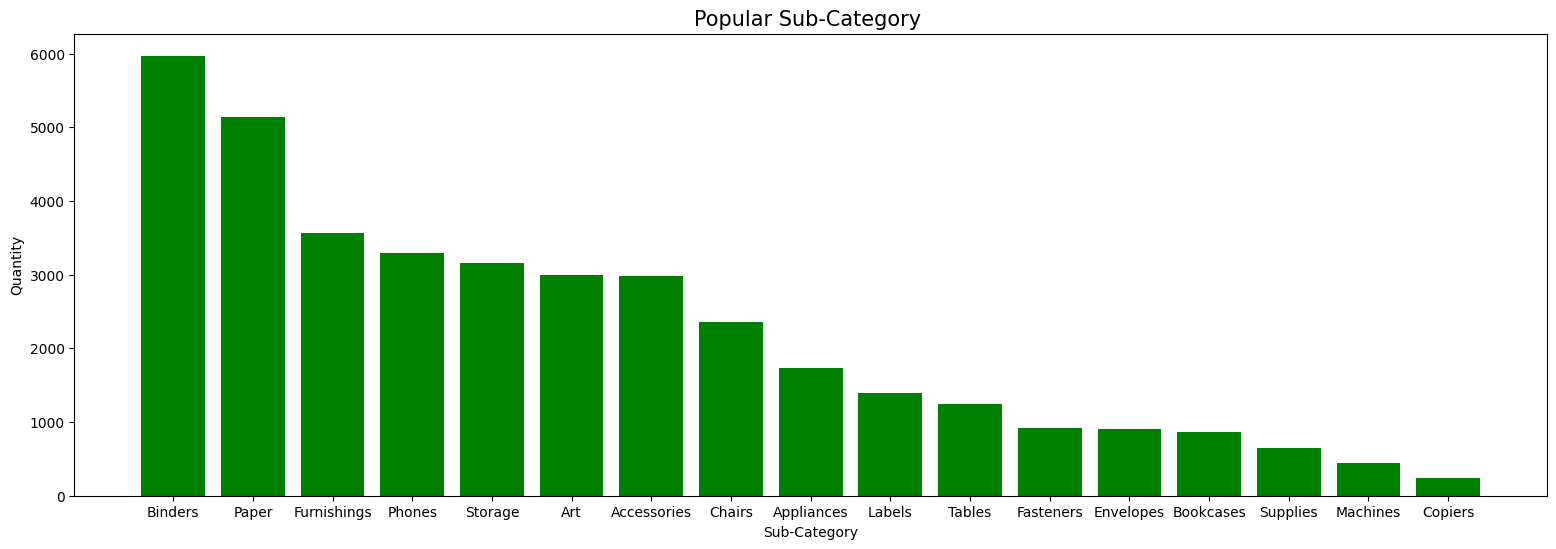

In [28]:
# Group by 'Sub_Category' and sum the 'Quantity'
product = superstore.groupby('Sub-Category')['Quantity'].sum().reset_index()
product = product.sort_values(by='Quantity', ascending=False).reset_index(drop=True)
product.index = product.index + 1

# Print the sorted DataFrame
print(tabulate(product, headers=['S.No', 'Sub-Category', 'Quantity'], tablefmt='grid'))

# Create a bar plot
m.figure(figsize=[19, 6])
m.bar(product['Sub-Category'], product['Quantity'], color='Green')

# Set labels and title
m.title('Popular Sub-Category ', fontsize=15)
m.xlabel('Sub-Category')
m.ylabel('Quantity')

# Show the plot
m.show()


Analyze the performance of each category/sub-category in terms of sales and profit.

In [29]:
product_performance = superstore.groupby(['Sub-Category', 'Category']).agg({'Quantity':'sum','Sales': 'sum', 'Profit': 'sum'}).reset_index()

product_sorted = product_performance.sort_values(by='Quantity', ascending=False).reset_index(drop = True)
product_sorted.index = product_sorted.index + 1

# Print the table with rounded values
print(tabulate(product_sorted, headers=['S.No', 'Sub-Category', 'Category', 'Quantity','Sales', 'Profit'], tablefmt='grid'))


+--------+----------------+-----------------+------------+-----------+------------+
|   S.No | Sub-Category   | Category        |   Quantity |     Sales |     Profit |
+========+================+=================+============+===========+============+
|      1 | Binders        | Office Supplies |       5971 | 100927    |  30228     |
+--------+----------------+-----------------+------------+-----------+------------+
|      2 | Paper          | Office Supplies |       5144 |  77598.8  |  33944.2   |
+--------+----------------+-----------------+------------+-----------+------------+
|      3 | Furnishings    | Furniture       |       3560 |  85008.2  |  13052.7   |
+--------+----------------+-----------------+------------+-----------+------------+
|      4 | Phones         | Technology      |       3289 | 222370    |  44515.7   |
+--------+----------------+-----------------+------------+-----------+------------+
|      5 | Storage        | Office Supplies |       3158 | 165560    |  2127

Correlation Analysis
--------------------

sales and profit Correlation 

Correlation between Sales and Profit: 0.183
Correlation between Sales and Quantity: 0.265
Correlation between Quantity and Profit: 0.066
correlation between Discount and Quantity: 0.009
Correlation between Discount and Profit: -0.22


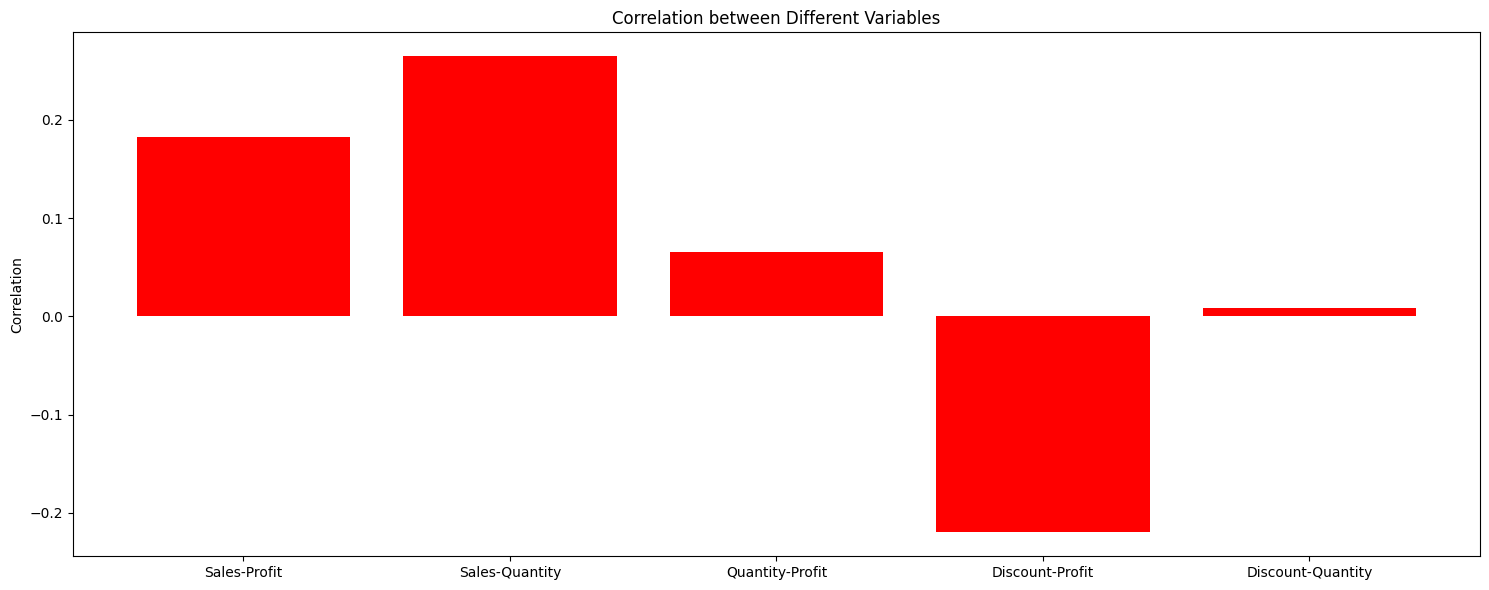

In [30]:
# Calculate correlations
corr_sales_profit = superstore['Sales'].corr(superstore['Profit']).round(3)
corr_sales_quantity = superstore['Sales'].corr(superstore['Quantity']).round(3)
corr_quantity_profit = superstore['Quantity'].corr(superstore['Profit']).round(3)
corr_discount_quantity = superstore['Discount'].corr(superstore['Quantity']).round(3)
corr_discount_profit = superstore['Discount'].corr(superstore['Profit']).round(3)

# Print correlations
print("Correlation between Sales and Profit:", corr_sales_profit)
print("Correlation between Sales and Quantity:", corr_sales_quantity)
print("Correlation between Quantity and Profit:", corr_quantity_profit)
print('correlation between Discount and Quantity:', corr_discount_quantity)
print("Correlation between Discount and Profit:", corr_discount_profit)


# Create a bar plot
fig, ax = m.subplots(figsize=(15, 6))  

# Define data for plotting
variables = ['Sales-Profit', 'Sales-Quantity', 'Quantity-Profit', 'Discount-Profit', 'Discount-Quantity']
correlations = [corr_sales_profit, corr_sales_quantity, corr_quantity_profit, corr_discount_profit, corr_discount_quantity]

# Plot the correlations
ax.bar(variables, correlations, color='red')

# Add labels and title
ax.set_ylabel('Correlation')
ax.set_title('Correlation between Different Variables')

# Show the plot
m.xticks(rotation=0)
m.tight_layout()
m.show()

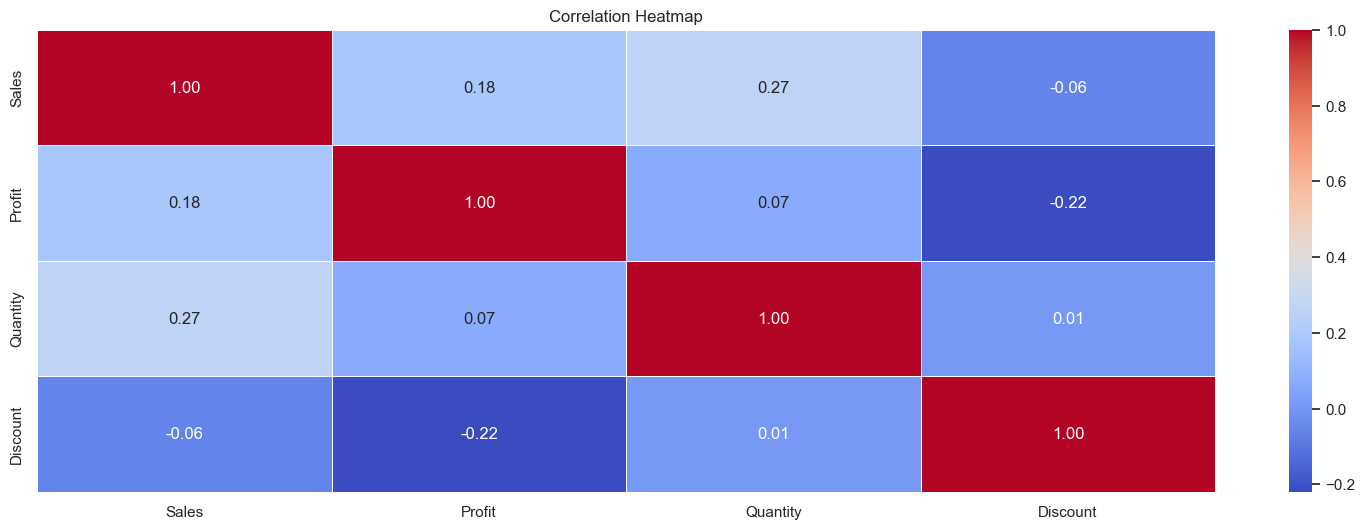

In [31]:
import matplotlib.pyplot as m
import seaborn as sb

# Set the style of seaborn
sb.set(style="white")

# Create a heatmap of correlations
correlation_matrix = superstore[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
m.figure(figsize=(19, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
m.title('Correlation Heatmap')
m.show()

Linear Regression Analysis
--------------------------

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the features (independent variables) and the target variable (dependent variable)
X = superstore[['Sales', 'Quantity', 'Discount']]
y = superstore['Profit']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Get the coefficients and intercept of the model
coefficients = model.coef_
intercept = model.intercept_

# Convert coefficients and intercept to strings
coefficients_str = [str(c) for c in coefficients]
intercept_str = str(intercept)

# Print the results using tabulate
results = [['Mean Squared Error', mse],
           ['Coefficients', coefficients_str],
           ['Intercept', intercept_str]]
print(tabulate(results, headers=['Metric', 'Value'], tablefmt='grid'))


+--------------------+----------------------------------------------------------------------+
| Metric             | Value                                                                |
+====================+======================================================================+
| Mean Squared Error | 72048.03882325177                                                    |
+--------------------+----------------------------------------------------------------------+
| Coefficients       | ['0.23001740411281413', '2.5131382346340443', '-236.79022772906907'] |
+--------------------+----------------------------------------------------------------------+
| Intercept          | 24.189647194569293                                                   |
+--------------------+----------------------------------------------------------------------+
